In [ ]:
#importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
cd /content/drive/"MyDrive/"

/content/drive/MyDrive


In [ ]:
dataset = pd.read_csv('Colab Notebooks/Linear Regression/time_series_covid19_deaths_US.csv')

#/content/drive/MyDrive/Colab Notebooks/synchronousmachine.csv

In [ ]:
dataset

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,1/2/22,1/3/22,1/4/22,1/5/22,1/6/22,1/7/22,1/8/22,1/9/22,1/10/22,1/11/22
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,160,160,161,161,161,162,162,162,162,162
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,593,593,594,594,598,601,603,603,603,603
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,81,81,81,81,83,83,83,83,83,83
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,95,95,95,95,95,95,95,95,95,95
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,198,198,198,198,198,199,202,202,202,202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,...,14,14,14,14,14,14,14,14,14,14
3338,84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,...,31,31,34,34,34,34,34,34,34,34
3339,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3340,84056043,US,USA,840,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,...,37,37,39,39,39,39,39,39,39,41


Analysing the dataset

In [ ]:
dataset.shape

(3342, 733)

In [ ]:
type(dataset)

pandas.core.frame.DataFrame

In [ ]:

dataf= pd.DataFrame(dataset)

In [ ]:
dataf.describe()

,UID,code3,FIPS,Lat,Long_,Population,1/22/20,1/23/20,1/24/20,1/25/20,...,1/2/22,1/3/22,1/4/22,1/5/22,1/6/22,1/7/22,1/8/22,1/9/22,1/10/22,1/11/22
count,3.342000e+03,3342.000000,3332.000000,3342.000000,3342.000000,3.342000e+03,3342.000000,3342.000000,3342.000000,3342.000000,...,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000
mean,8.342992e+07,834.494913,33043.078932,36.721617,-88.642045,9.960357e+04,0.000299,0.000299,0.000299,0.000299,...,247.243866,247.748953,248.394375,248.988630,249.548175,250.330640,250.528426,250.647816,251.196888,251.987133
std,4.314076e+06,36.487378,18648.808931,9.079322,21.776287,3.241661e+05,0.017298,0.017298,0.017298,0.017298,...,936.132294,937.010542,938.688659,939.992162,941.748140,943.997839,944.615557,945.280687,947.253373,949.317412
min,1.600000e+01,16.000000,60.000000,-14.271000,-174.159600,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.401811e+07,840.000000,19076.500000,33.896803,-97.803595,9.917250e+03,0.000000,0.000000,0.000000,0.000000,...,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
50%,8.402921e+07,840.000000,31012.000000,38.005610,-89.488865,2.489150e+04,0.000000,0.000000,0.000000,0.000000,...,71.500000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,73.000000,73.000000
75%,8.404612e+07,840.000000,47129.500000,41.579255,-82.313398,6.497525e+04,0.000000,0.000000,0.000000,0.000000,...,177.750000,178.000000,179.000000,179.000000,179.750000,180.750000,180.750000,180.750000,180.750000,181.000000
max,8.410000e+07,850.000000,99999.000000,69.314792,145.673900,1.003911e+07,1.000000,1.000000,1.000000,1.000000,...,27640.000000,27647.000000,27671.000000,27698.000000,27728.000000,27756.000000,27772.000000,27785.000000,27798.000000,27812.000000


In [ ]:
col = list(dataset.columns.values)
print(col)

['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key', 'Population', '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20', '4/9/20', '4/10/20', '4/11/20', '4/

In [ ]:

col_value = (list(dataf.sum(axis = 0, skipna = True)))
#print(col_value)
df1 = pd.DataFrame(list(zip(col, col_value)),columns =['Title', 'Values'])

df1.set_index('Title',inplace=True)
#print(df1)
#df1.drop(df1.index[["Province/State"]])

data = df1.drop(df1.index)
print(df1)



                                                    Values
Title                                                     
UID                                           278822801147
iso2     USUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUS...
iso3     USAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAU...
code3                                              2788882
FIPS                                           110099539.0
...                                                    ...
1/6/22                                              836605
1/7/22                                              837266
1/8/22                                              837665
1/9/22                                              839500
1/10/22                                             842141

[732 rows x 1 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [ ]:
col1 = list(df1.columns.values)
print(col1)
#df1 = df1.drop("FIPS") 
#df1 = df1.drop("Admin2") 
#df1 = df1.drop("Province_State")
#df1 = df1.drop("Lat")
#f1 = df1.drop("Country_Region")
#df1 = df1.drop("Long_")
#df1 = df1.drop("Combined_Key")
#df1 = df1.drop("Population")   
df1

['Values']


,Values
Title,
1/22/20,1
1/23/20,1
1/24/20,1
1/25/20,1
1/26/20,1
...,...
1/6/22,836605
1/7/22,837266
1/8/22,837665


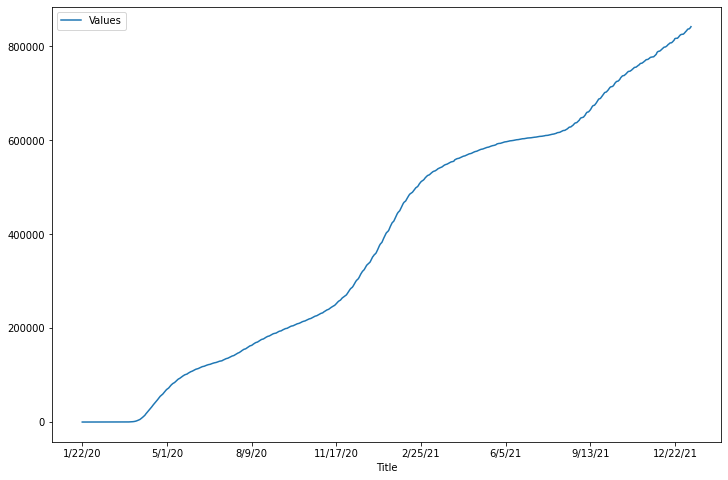

In [ ]:
df1.columns = ['Values']
df1.plot(figsize=(12,8))

In [ ]:
df1['Value_LastMonth']=df1['Values'].shift(+1)
df1['Value_2Monthsback']=df1['Values'].shift(+2)
df1['Value_3Monthsback']=df1['Values'].shift(+3)
df1  

,Values,Value_LastMonth,Value_2Monthsback,Value_3Monthsback
Title,,,,
1/22/20,1,NaN,NaN,NaN
1/23/20,1,1,NaN,NaN
1/24/20,1,1,1,NaN
1/25/20,1,1,1,1
1/26/20,1,1,1,1
...,...,...,...,...
1/6/22,836605,833990,832120,830134
1/7/22,837266,836605,833990,832120
1/8/22,837665,837266,836605,833990


In [ ]:
df1=df1.dropna()
df1

,Values,Value_LastMonth,Value_2Monthsback,Value_3Monthsback
Title,,,,
1/25/20,1,1,1,1
1/26/20,1,1,1,1
1/27/20,1,1,1,1
1/28/20,1,1,1,1
1/29/20,1,1,1,1
...,...,...,...,...
1/6/22,836605,833990,832120,830134
1/7/22,837266,836605,833990,832120
1/8/22,837665,837266,836605,833990


In [ ]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()

In [ ]:
import numpy as np
x1,x2,x3,y=df1['Value_LastMonth'],df1['Value_2Monthsback'],df1['Value_3Monthsback'],df1['Values']
x1,x2,x3,y=np.array(x1),np.array(x2),np.array(x3),np.array(y)
x1,x2,x3,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3),axis=1)
print(final_x)

[[1 1 1]
 [1 1 1]
 [1 1 1]
 ...
 [837266 836605 833990]
 [837665 837266 836605]
 [839500 837665 837266]]


In [ ]:
X_train,X_test,y_train,y_test=final_x[:-30],final_x[-30:],y[:-30],y[-30:]
lin_model = LinearRegression()

In [ ]:
#model.fit(X_train,y_train)
lin_model.fit(X_train,y_train)

LinearRegression()

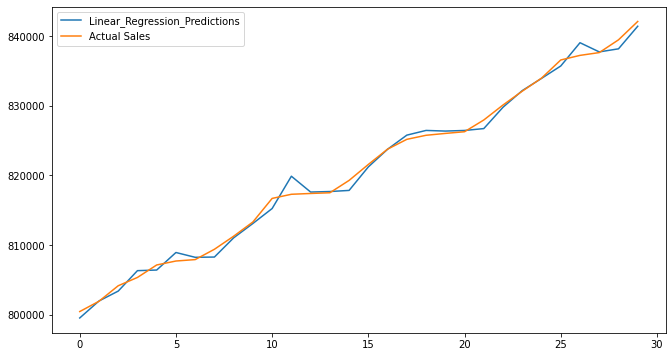

In [ ]:
lin_pred=lin_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11,6)
plt.plot(lin_pred,label='Linear_Regression_Predictions')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

In [ ]:
x_value=df1.iloc[4:,0:1]
y_value=df1.iloc[4:,1:2]

In [ ]:
x_value

,Title
4,1/22/20
5,1/23/20
6,1/24/20
7,1/25/20
8,1/26/20
...,...
719,1/6/22
720,1/7/22
721,1/8/22
722,1/9/22


In [ ]:

y_value

,Values
4,32
5,39
6,42
7,56
8,65
...,...
719,0
720,0
721,0
722,0


In [ ]:
#cleaning the dataset
#remove the na values
training_dataset=df1
cleaned_dataset=training_dataset.dropna()

In [ ]:
cleaned_dataset.shape

(724, 2)

In [ ]:
cleaned_dataset

,Title,Values
0,Province/State,AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...
1,Country/Region,4944.987387
2,Lat,7151.063898
3,Long,30
4,1/22/20,32
...,...,...
719,1/6/22,0
720,1/7/22,0
721,1/8/22,0
722,1/9/22,0


In [ ]:
x_new = cleaned_dataset['Title']

In [ ]:
y_new = cleaned_dataset['Values']

In [ ]:
x_value1=cleaned_dataset.iloc[4:,0:1]
y_value1=cleaned_dataset.iloc[4:,1:2]
print(x_value1)


       Title
4    1/22/20
5    1/23/20
6    1/24/20
7    1/25/20
8    1/26/20
..       ...
719   1/6/22
720   1/7/22
721   1/8/22
722   1/9/22
723  1/10/22

[720 rows x 1 columns]


In [ ]:
x_train = x_value1.values.reshape(x_value1.size)

In [ ]:

y_train = y_value1.values.reshape(y_value1.size)

In [ ]:
dates = x_value1['Title']
#print(dates)
date_format = [pd.to_datetime(d) for d in dates]
print(date_format)

[Timestamp('2020-01-22 00:00:00'), Timestamp('2020-01-23 00:00:00'), Timestamp('2020-01-24 00:00:00'), Timestamp('2020-01-25 00:00:00'), Timestamp('2020-01-26 00:00:00'), Timestamp('2020-01-27 00:00:00'), Timestamp('2020-01-28 00:00:00'), Timestamp('2020-01-29 00:00:00'), Timestamp('2020-01-30 00:00:00'), Timestamp('2020-01-31 00:00:00'), Timestamp('2020-02-01 00:00:00'), Timestamp('2020-02-02 00:00:00'), Timestamp('2020-02-03 00:00:00'), Timestamp('2020-02-04 00:00:00'), Timestamp('2020-02-05 00:00:00'), Timestamp('2020-02-06 00:00:00'), Timestamp('2020-02-07 00:00:00'), Timestamp('2020-02-08 00:00:00'), Timestamp('2020-02-09 00:00:00'), Timestamp('2020-02-10 00:00:00'), Timestamp('2020-02-11 00:00:00'), Timestamp('2020-02-12 00:00:00'), Timestamp('2020-02-13 00:00:00'), Timestamp('2020-02-14 00:00:00'), Timestamp('2020-02-15 00:00:00'), Timestamp('2020-02-16 00:00:00'), Timestamp('2020-02-17 00:00:00'), Timestamp('2020-02-18 00:00:00'), Timestamp('2020-02-19 00:00:00'), Timestamp('20

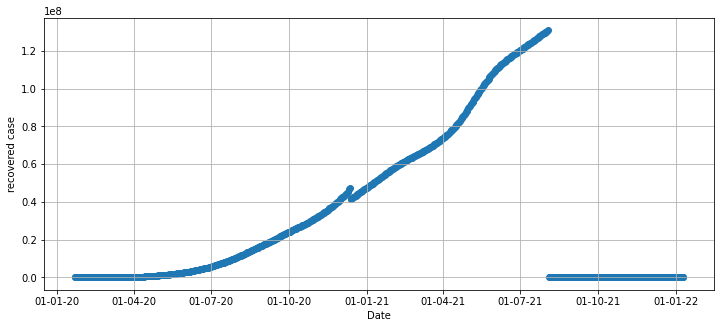

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5 ))
ax.grid()
ax.scatter(date_format,y_value1['Values'])
ax.set(xlabel="Date",ylabel="recovered case")
date_form = DateFormatter('%d-%m-%y')
#print(date_form)
ax.xaxis.set_major_formatter(date_form)
#ax.xaxis.set_major_locator(mdates.DayLocator(interval = 15))
plt.show()

In [ ]:
df1['Time'] = np.arange(len(df1.index))

In [ ]:
print(df1)

              Title                                             Values  Time
0    Province/State  AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...     0
1    Country/Region                                        4944.987387     1
2               Lat                                        7151.063898     2
3              Long                                                 30     3
4           1/22/20                                                 32     4
..              ...                                                ...   ...
719          1/6/22                                                  0   719
720          1/7/22                                                  0   720
721          1/8/22                                                  0   721
722          1/9/22                                                  0   722
723         1/10/22                                                  0   723

[724 rows x 3 columns]


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import scale 
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

# Training data
X = df1.loc[4:500, ['Time']]  # features
y = df1.loc[4:500, 'Values']  # target

reg = Lasso(alpha=1)
reg.fit(X,y)

y_pred1 = pd.Series(reg.predict(X), index=X.index)
print(y_pred1)

4     -2.006635e+07
5     -1.985660e+07
6     -1.964685e+07
7     -1.943711e+07
8     -1.922736e+07
           ...     
496    8.312825e+07
497    8.333799e+07
498    8.354774e+07
499    8.375748e+07
500    8.396723e+07
Length: 497, dtype: float64


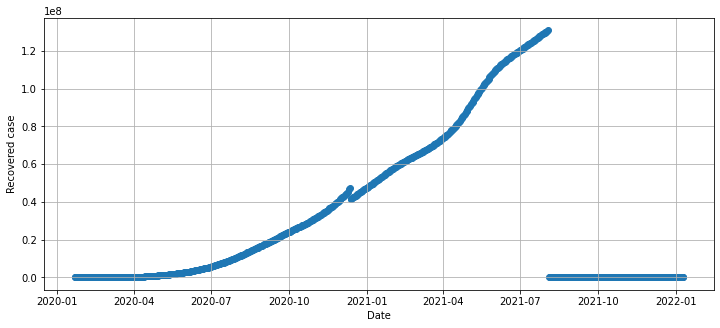

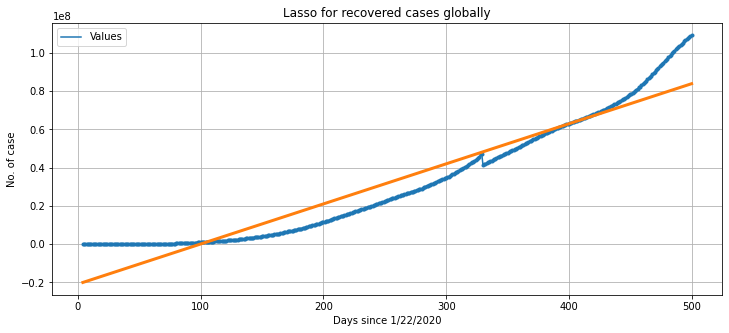

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from skle

Text(0, 0.5, 'weights')

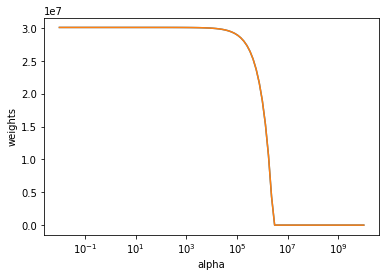

In [ ]:
plot_params = dict(
    style=".-",
    legend=True,
)

fig, ax = plt.subplots(figsize=(12, 5 ))
ax.grid()
ax.scatter(date_format,y_value1['Values'])
ax.set(xlabel="Date",ylabel="Recovered case")

fig, ax = plt.subplots(figsize=(12, 5 ))
ax = y.plot(**plot_params)
ax = y_pred1.plot(ax=ax, linewidth=3)
ax.set_title('Lasso for recovered cases globally');
ax.set(xlabel="Days since 1/22/2020",ylabel="No. of case")
ax.grid();
plt.show();


alphas = 10**np.linspace(10,-2,100)*0.5

lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X), y)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X, y)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X, y)
mean_squared_error(y, lasso.predict(X))
pd.Series(lasso.coef_, index=X.columns)



In [ ]:
from sklearn.linear_model import LinearRegression

# Training data
X = df1.loc[4:500, ['Time']]  # features
y = df1.loc[4:500, 'Values']  # target

# Train the model
model = LinearRegression()
model.fit(X, y)

# Store the fitted values as a time series with the same time index as
# the training data
y_pred = pd.Series(model.predict(X), index=X.index)

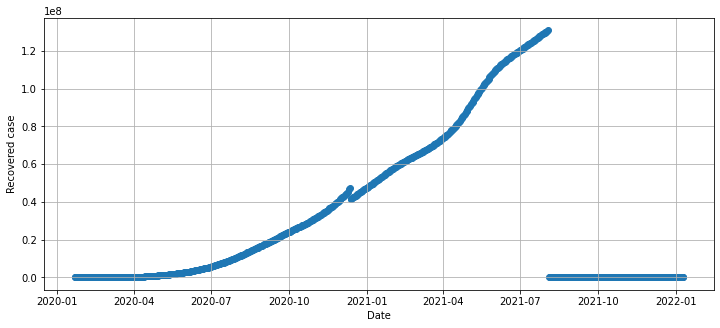

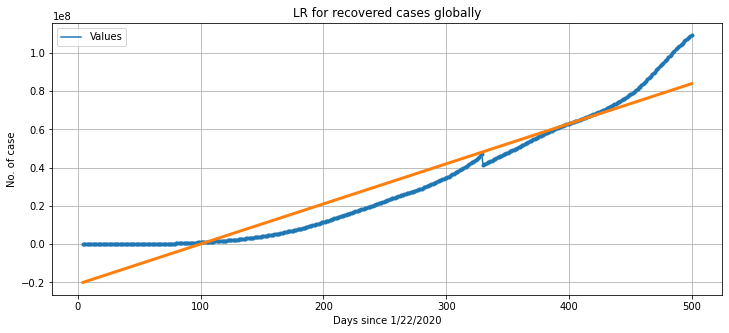

In [ ]:
plot_params = dict(
    style=".-",
    legend=True,
)

fig, ax = plt.subplots(figsize=(12, 5 ))
ax.grid()
ax.scatter(date_format,y_value1['Values'])
ax.set(xlabel="Date",ylabel="Recovered case")

fig, ax = plt.subplots(figsize=(12, 5 ))
ax = y.plot(**plot_params)
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('LR for recovered cases globally');
ax.set(xlabel="Days since 1/22/2020",ylabel="No. of case")
ax.grid();

